In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#Start by connecting gdrive into the google colab
#only do this once
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#upload from google drive into colab
df = pd.read_csv('/content/drive/My Drive/Data_Science_Bootcamp/ess_combined_2012_2014.csv')

In [30]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [ ]:
#Did people become less trusting from 2012 to 2014?

In [12]:
df['ppltrst'].describe()

count    8147.000000
mean        5.574936
std         2.215745
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: ppltrst, dtype: float64

In [18]:
df['year'].unique()

array([6, 7])

In [23]:
year2012 = df[df['year'] == 6]
year2014 = df[df['year'] == 7]

[Text(0, 0.5, 'Count'), Text(0.5, 0, '')]

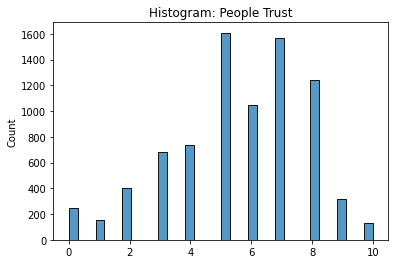

In [15]:
ax = sns.histplot(df['ppltrst'])
ax.set_title('Histogram: People Trust')
ax.set(xlabel='', ylabel='Count')

(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

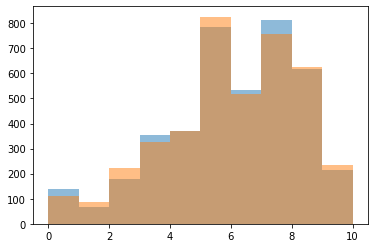

In [26]:
plt.hist(year2012['ppltrst'], alpha = .5)
plt.hist(year2014['ppltrst'], alpha = .5)

In [29]:
ttest = stats.ttest_ind(year2012['ppltrst'], year2014['ppltrst'])
print("The t-test statistic is {} with a p-value of {}.".format(round(ttest.statistic,2),ttest.pvalue))

The t-test statistic is 0.14 with a p-value of 0.8852130548889106.


In [ ]:
#Did people become happier from 2012 to 2014?

(array([103., 101., 246., 470., 436., 834., 589., 660., 452., 185.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

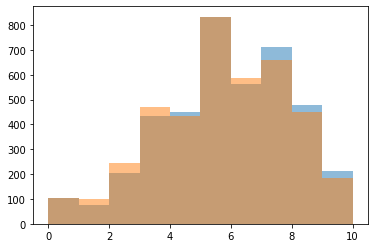

In [31]:
plt.hist(year2012['pplhlp'], alpha = .5)
plt.hist(year2014['pplhlp'], alpha = .5)

In [32]:
ttest = stats.ttest_ind(year2012['pplhlp'], year2014['pplhlp'])
print("The t-test statistic is {} with a p-value of {}.".format(round(ttest.statistic,2),ttest.pvalue))

The t-test statistic is 2.97 with a p-value of 0.002977803992604439.


In [ ]:
#Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
#Are there differences, and if so, which countries stand out?

In [35]:
year2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [37]:
#switerland, czech republic, germany 
ch14 = year2014[year2014['cntry'] == 'CH']
cz14 = year2014[year2014['cntry'] == 'CZ']
de14 = year2014[year2014['cntry'] == 'DE']

(array([1., 0., 0., 7., 0., 0., 5., 0., 0., 1.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

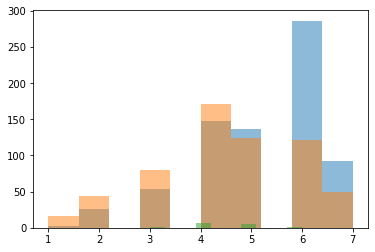

In [38]:
plt.hist(ch14['sclmeet'], alpha = .5)
plt.hist(cz14['sclmeet'], alpha = .5)
plt.hist(de14['sclmeet'], alpha = .5)

In [41]:
ftest = stats.f_oneway(ch14['sclmeet'], cz14['sclmeet'], de14['sclmeet'])
print("F Statistic is {} with a p-value of {}".format(round(ftest.statistic,2), ftest.pvalue))

F Statistic is 41.47 with a p-value of 3.288241543230333e-18


In [49]:
tukey = pairwise_tukeyhsd(endog=year2014['sclmeet'],    # Data
                           groups = year2014['cntry'], # Groups
                           alpha = 0.05)     

In [50]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    CH     CZ  -0.6799  0.001 -0.8963 -0.4635   True
    CH     DE  -0.7464 0.3455  -1.813  0.3202  False
    CH     ES   0.0887 0.7263 -0.0979  0.2753  False
    CH     NO   0.1354  0.428 -0.0719  0.3428  False
    CH     SE   0.2599 0.0025  0.0622  0.4575   True
    CZ     DE  -0.0665    0.9 -1.1353  1.0024  False
    CZ     ES   0.7686  0.001  0.5697  0.9676   True
    CZ     NO   0.8153  0.001  0.5968  1.0339   True
    CZ     SE   0.9398  0.001  0.7304  1.1491   True
    DE     ES   0.8351   0.22 -0.2281  1.8983  False
    DE     NO   0.8818 0.1724 -0.1852  1.9489  False
    DE     SE   1.0063  0.077  -0.059  2.0715  False
    ES     NO   0.0467    0.9 -0.1423  0.2358  False
    ES     SE   0.1712 0.0688 -0.0072  0.3495  False
    NO     SE   0.1244 0.4833 -0.0755  0.3244  False
----------------------------------------------

In [ ]:
#Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. 
#Are there differences, and if so, which countries stand out?

In [75]:
#youngch14 = ch14[ch14['agea'] <= (ch14['agea'].describe()[4])]
#middlech14 = ch14[(ch14['agea'] <= (ch14['agea'].describe()[6])) & (ch14['agea']>(ch14['agea'].describe()[4]))] 
#oldch14 = ch14[ch14['agea'] > (ch14['agea'].describe()[6])]

#youngcz14 = cz14[cz14['agea'] <= (cz14['agea'].describe()[4])]
#middlecz14 = cz14[(cz14['agea'] <= (cz14['agea'].describe()[6])) & (cz14['agea']>(cz14['agea'].describe()[4]))] 
#oldcz14 = cz14[cz14['agea'] > (cz14['agea'].describe()[6])]

#youngde14 = de14[de14['agea'] <= (de14['agea'].describe()[4])]
#middlede14 = de14[(ch14['agea'] <= (de14['agea'].describe()[6])) & (de14['agea']>(de14['agea'].describe()[4]))] 
#oldde14 = de14[de14['agea'] > (de14['agea'].describe()[6])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


(array([1., 0., 0., 3., 0., 0., 9., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

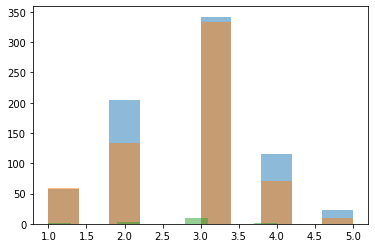

In [76]:
plt.hist(ch14['sclact'], alpha = .5)
plt.hist(cz14['sclact'], alpha = .5)
plt.hist(de14['sclact'], alpha = .5)

In [77]:
ftest = stats.f_oneway(ch14['sclact'], cz14['sclact'], de14['sclact'])
print("F Statistic is {} with a p-value of {}".format(round(ftest.statistic,2), ftest.pvalue))

F Statistic is 0.68 with a p-value of 0.5065197308755334


In [78]:
#upload from google drive into colab
df2 = pd.read_csv('/content/drive/My Drive/Data_Science_Bootcamp/rfft.csv')

In [79]:
df2.columns

Index(['Casenr', 'Age', 'Gender', 'Education', 'Measurement', 'Unique',
       'Perseverative', 'Interval'],
      dtype='object')

In [ ]:
#Is there a significant difference in the number of unique designs drawn by the same participants 
#from measurement 2 to measurement 3?

In [81]:
df2['Unique'].describe()

count    7545.000000
mean       78.113188
std        27.195229
min        13.000000
25%        57.000000
50%        78.500000
75%        97.000000
max       161.500000
Name: Unique, dtype: float64

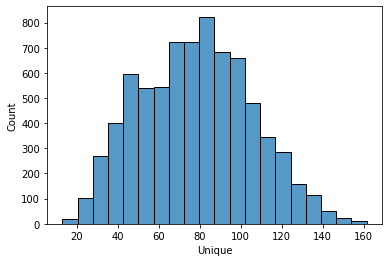

In [83]:
sns.histplot(df2['Unique'], bins=20)

In [88]:
df2['Casenr'].head(30)

0      1
1      1
2      1
3      2
4      2
5      2
6      3
7      3
8      3
9      4
10     4
11     4
12     5
13     5
14     5
15     6
16     6
17     6
18     7
19     7
20     7
21     8
22     8
23     8
24     9
25     9
26     9
27    10
28    10
29    10
Name: Casenr, dtype: int64

count                          7545
unique                            3
top       Measurement 1 (2003-2006)
freq                           2515
Name: Measurement, dtype: object

In [96]:
df2_pivot = df2.pivot(index='Casenr', columns='Measurement', values='Unique')

In [98]:
df2_pivot.head(10)

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0
6,63.0,68.5,60.5
7,42.0,50.0,91.0
8,83.0,86.0,104.5
9,78.0,49.5,86.0


In [99]:
ttestpaired = stats.ttest_rel(df2_pivot['Measurement 2 (2006-2008)'], df2_pivot['Measurement 3 (2008-2012)'])
print("The t-test statistic is {} with a p-value of {}.".format(round(ttestpaired.statistic,2),ttestpaired.pvalue))

The t-test statistic is -10.89 with a p-value of 5.3585747477799544e-27.


In [ ]:
#Is there a significant difference in the number of perseverative errors drawn by the same participants 
#from measurement 2 to measurement 3?

In [100]:
df2_pivot2 = df2.pivot(index='Casenr', columns='Measurement', values='Perseverative')

In [102]:
df2_pivot2.head(10)

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0
6,25.0,18.0,13.5
7,25.0,36.0,30.0
8,7.0,9.0,12.5
9,7.0,4.5,8.0


In [103]:
#ttestpaired2 = stats.ttest_rel(df2_pivot2['Measurement 2 (2006-2008)'], df2_pivot2['Measurement 3 (2008-2012)'])
#print("The t-test statistic is {} with a p-value of {}.".format(round(ttestpaired2.statistic,2),ttestpaired2.pvalue))

The t-test statistic is -1.09 with a p-value of 0.27433338529853313.


(array([1704.,  510.,  177.,   60.,   30.,   13.,    8.,    6.,    4.,
           3.]),
 array([  0. ,  12.4,  24.8,  37.2,  49.6,  62. ,  74.4,  86.8,  99.2,
        111.6, 124. ]),
 <a list of 10 Patch objects>)

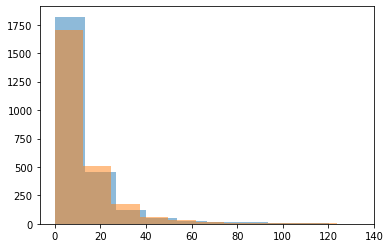

In [104]:
plt.hist(df2_pivot2['Measurement 2 (2006-2008)'], alpha = .5)
plt.hist(df2_pivot2['Measurement 3 (2008-2012)'], alpha = .5)


In [105]:
stats.wilcoxon(df2_pivot2['Measurement 3 (2008-2012)'], df2_pivot2['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)